In [1]:
import pandas as pd

In [2]:
# import training data
file = "training_data.csv"
df = pd.read_csv(file, delimiter=",", names=['feature_A', 'feature_B'])
df

,feature_A,feature_B
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980
...,...,...
4495,-0.578848,0.689333
4496,-0.084657,1.019098
4497,1.897556,-0.094781
4498,1.373081,-0.399360


In [3]:
df.shape

(4500, 2)

In [4]:
df.head()

,feature_A,feature_B
0,-0.235312,1.057181
1,0.812545,-0.551579
2,1.435676,-0.448038
3,1.612300,-0.311149
4,0.336496,0.087980


In [5]:
df.describe()

,feature_A,feature_B
count,4500.000000,4500.000000
mean,0.501716,0.247537
std,0.870713,0.506289
min,-1.308579,-0.765779
25%,-0.057827,-0.207921
50%,0.515105,0.238530
75%,1.072719,0.693420
max,2.307367,1.262082


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_A  4500 non-null   float64
 1   feature_B  4500 non-null   float64
dtypes: float64(2)
memory usage: 70.4 KB


In [7]:
# import class labels and merge dataframe
class_label_df = pd.read_csv("training_data_class_labels.csv", names=["label"])
df["class_label"] = class_label_df
df

,feature_A,feature_B,class_label
0,-0.235312,1.057181,0
1,0.812545,-0.551579,1
2,1.435676,-0.448038,1
3,1.612300,-0.311149,1
4,0.336496,0.087980,1
...,...,...,...
4495,-0.578848,0.689333,0
4496,-0.084657,1.019098,0
4497,1.897556,-0.094781,1
4498,1.373081,-0.399360,1


In [8]:
df['class_label'].value_counts()

0    2250
1    2250
Name: class_label, dtype: int64

In [9]:
class_values = df["class_label"].unique()
class_count = df['class_label'].value_counts()
class_values
class_count

0    2250
1    2250
Name: class_label, dtype: int64

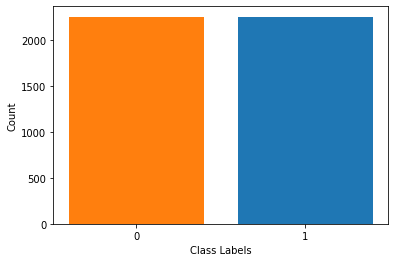

In [10]:
# check occurrences of class 0 and 1
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

ax = plt.axes()

plt.bar(class_values, class_count, color=['tab:orange', 'tab:blue'])
plt.xlabel("Class Labels")
plt.ylabel("Count")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

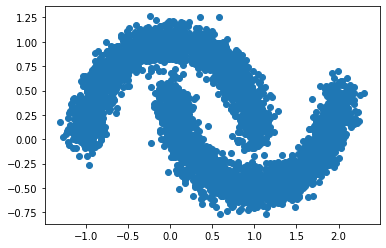

In [11]:
# scatter plot
plt.scatter(df.feature_A, df.feature_B)
plt.show()

## Parameter Tuning

<ol> 
    <li> Naive Bayes Classifier </li>
    <li> Logistic Regressor Classifier </li>
    <li> k-Nearest Neighbor CLassifier </li>
</ol>

In [12]:
X = df.drop(columns=['class_label'],axis=1)
y = df['class_label']

### 1. Naive Bayes Classifier

In [13]:
# Gaussian Naive Bayes Classifier
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,GridSearchCV

import seaborn as sns

%matplotlib inline

In [14]:
model = GaussianNB()
cv_scores = cross_val_score(model, X, y, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

GaussianNB()  mean accuracy:  87.978 % std:  0.008 %


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1350 points : 178


In [17]:
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8841269841269841
accuracy_score on test dataset :  0.8681481481481481


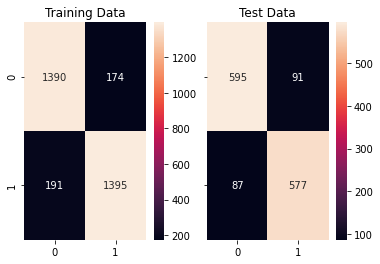

In [18]:
# confusion matrix
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1564
           1       0.89      0.88      0.88      1586

    accuracy                           0.88      3150
   macro avg       0.88      0.88      0.88      3150
weighted avg       0.88      0.88      0.88      3150

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       686
           1       0.86      0.87      0.87       664

    accuracy                           0.87      1350
   macro avg       0.87      0.87      0.87      1350
weighted avg       0.87      0.87      0.87      1350



In [20]:
# parameter tuning GaussianNB
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [21]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [22]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [23]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8703703703703703


### 2. Logistic Regression Classifier

In [24]:
# Logistic Regression Classifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns

%matplotlib inline

In [25]:
model = LogisticRegression()
cv_scores = cross_val_score(model, X, y, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

LogisticRegression()  mean accuracy:  88.111 % std:  0.007 %


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1350 points : 170


In [27]:
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.8847619047619047
accuracy_score on test dataset :  0.8740740740740741


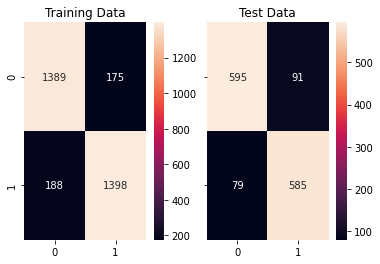

In [28]:
# confusion matrix
from sklearn import metrics
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,predict_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,predict_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train,predict_train))
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1564
           1       0.89      0.88      0.89      1586

    accuracy                           0.88      3150
   macro avg       0.88      0.88      0.88      3150
weighted avg       0.88      0.88      0.88      3150

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       686
           1       0.87      0.88      0.87       664

    accuracy                           0.87      1350
   macro avg       0.87      0.87      0.87      1350
weighted avg       0.87      0.87      0.87      1350



In [30]:
# parameter tuning LogisticRegressor
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv_method, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

Data_transformed = PowerTransformer().fit_transform(X_test)

grid_search.fit(Data_transformed, y_test);

In [31]:
# predict the target on the test dataset
predict_test = grid_search.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8785185185185185


### 3. k-Nearest Neighbor Classifier

In [32]:
# k-Nearest Neighbor Classifier
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

import seaborn as sns

%matplotlib inline

In [33]:
model = KNeighborsClassifier()
cv_scores = cross_val_score(model, X, y, cv=5)
    
print(model, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

KNeighborsClassifier()  mean accuracy:  99.911 % std:  0.0 %


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1350 points : 1


In [35]:
predict_train = model.fit(X_train, y_train).predict(X_train)

# Accuracy Score on train dataset
accuracy_train = accuracy_score(y_train, predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on train dataset :  0.9990476190476191
accuracy_score on test dataset :  0.9992592592592593


In [36]:
# models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.999704 using {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.999407 (0.000983) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.999407 (0.000983) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.999259 (0.001048) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.999259 (0.001048) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.999037 (0.001101) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.999111 (0.001089) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.999185 (0.001071) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.999259 (0.001048) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.999185 (0.001071) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.999259 (0.001048) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.999111 (

In [37]:
# selected model: parameter tuned kNN
model = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='manhattan')

# import test dataset
test_df = pd.read_csv("test_data.csv", names=["feature_A", "feature_B"])

# predict
predict_test = model.fit(X, y).predict(X_test)

predict_test

array([0, 1, 1, ..., 0, 0, 0])

In [38]:
# exporting output
file = open("test_data_class_labels.txt", "w")
np.savetxt(file, predict_test, fmt='%d')
    
file.close()